In [6]:
# use any dataset linke and download dataset
#LINK= kaggle datasets download -d ananthr1/weather-prediction
# this dataset use to predict the weather
#Using the Columns :
#* precipitation
#* tempmax * tempmin
#* wind
#We are going to predict the weather condition :
#* drizzle
#* rain
#* sun
#* snow
#* fog


# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
pwd()

'C:\\Users\\CITS\\Downloads'

In [8]:
weather1 = pd.read_csv("C:\\Users\\CITS\\Downloads\\seattle_weather.csv",index_col=0)

In [9]:
weather1

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


In [10]:
#data type
type(weather1)
weather1.shape

(1461, 5)

In [11]:
weather1.dtypes

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [128]:
#check null values
weather1.isnull()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,False,False,False,False,False
2012-01-02,False,False,False,False,False
2012-01-03,False,False,False,False,False
2012-01-04,False,False,False,False,False
2012-01-05,False,False,False,False,False
...,...,...,...,...,...
2015-12-27,False,False,False,False,False
2015-12-28,False,False,False,False,False
2015-12-29,False,False,False,False,False


In [12]:
weather1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


In [13]:
#will introduce NA values for non numeric data in the columns
weather1['precipitation']=pd.to_numeric(weather1['precipitation'],errors='coerce')
weather1['temp_max']=pd.to_numeric(weather1['temp_max'],errors='coerce')
weather1['temp_min']=weather1['temp_min'].astype('category')
weather1['wind']=weather1['wind'].astype('int64')

In [66]:
weather1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   precipitation  1461 non-null   float64 
 1   temp_max       1461 non-null   float64 
 2   temp_min       1461 non-null   category
 3   wind           1461 non-null   int64   
 4   weather        1461 non-null   object  
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 61.0+ KB


In [14]:
#count the duplicate value
weather1[weather1.duplicated()].shape

(83, 5)

In [15]:
weather1.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4,drizzle
2012-01-02,10.9,10.6,2.8,4,rain
2012-01-03,0.8,11.7,7.2,2,rain
2012-01-04,20.3,12.2,5.6,4,rain
2012-01-05,1.3,8.9,2.8,6,rain


In [16]:
weather1[weather1.duplicated()]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-07-07,0.0,26.7,12.8,3,sun
2013-02-11,0.3,8.3,4.4,1,rain
2013-03-24,0.0,12.2,0.6,2,sun
2013-05-08,0.0,19.4,11.1,1,sun
2013-06-02,1.0,20.6,12.2,3,rain
...,...,...,...,...,...
2015-09-09,0.0,24.4,13.9,3,sun
2015-09-15,0.0,17.8,10.0,2,sun
2015-09-19,0.0,21.1,14.4,4,sun


In [89]:
weather_cleaned_1=weather1.drop_duplicates()

In [90]:
weather_cleaned_1.shape

(1378, 5)

In [91]:
#drop value temp_min
weather_cleaned_2 = weather_cleaned_1.drop('temp_min',axis=1)

In [92]:
weather_cleaned_2

,precipitation,temp_max,wind,weather
date,,,,
2012-01-01,0.0,12.8,4,drizzle
2012-01-02,10.9,10.6,4,rain
2012-01-03,0.8,11.7,2,rain
2012-01-04,20.3,12.2,4,rain
2012-01-05,1.3,8.9,6,rain
...,...,...,...,...
2015-12-27,8.6,4.4,2,rain
2015-12-28,1.5,5.0,1,rain
2015-12-29,0.0,7.2,2,fog


<AxesSubplot:xlabel='weather', ylabel='count'>

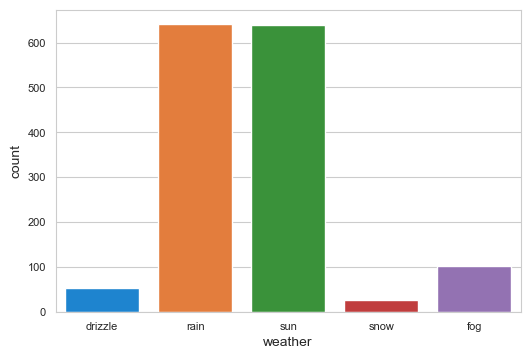

In [144]:
#use countplot to see what is count of weather 
sns.set_style('whitegrid')
sns.countplot(x='weather',data=weather1)

<AxesSubplot:xlabel='wind', ylabel='count'>

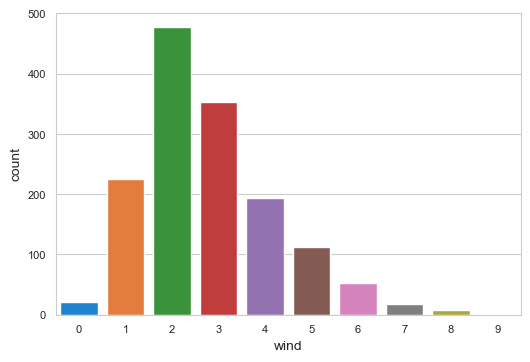

In [130]:

sns.set_style('whitegrid')
sns.countplot(x='wind',data=weather1)

In [137]:
weather_cleaned_2

,precipitation,temp_max,wind,weather
date,,,,
2012-01-01,0.0,12.8,4,drizzle
2012-01-02,10.9,10.6,4,rain
2012-01-03,0.8,11.7,2,rain
2012-01-04,20.3,12.2,4,rain
2012-01-05,1.3,8.9,6,rain
...,...,...,...,...
2015-12-27,8.6,4.4,2,rain
2015-12-28,1.5,5.0,1,rain
2015-12-29,0.0,7.2,2,fog


In [140]:
weather_cleaned_3 = weather_cleaned_2.rename({'temp_max':'temp_MAX'},axis=1)

In [141]:
weather_cleaned_3

,precipitation,temp_MAX,wind,weather
date,,,,
2012-01-01,0.0,12.8,4,drizzle
2012-01-02,10.9,10.6,4,rain
2012-01-03,0.8,11.7,2,rain
2012-01-04,20.3,12.2,4,rain
2012-01-05,1.3,8.9,6,rain
...,...,...,...,...
2015-12-27,8.6,4.4,2,rain
2015-12-28,1.5,5.0,1,rain
2015-12-29,0.0,7.2,2,fog


<AxesSubplot:>

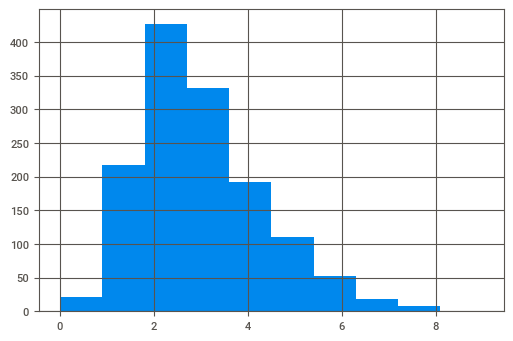

In [97]:
#use histogram of wind
weather_cleaned_2['wind'].hist()

In [98]:
# use box plot
weather_box = weather_cleaned_2.dropna()

{'whiskers': [<matplotlib.lines.Line2D at 0x1f01e050f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1f024abf6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f01e050bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f024abfdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f024aca190>],
 'means': []}

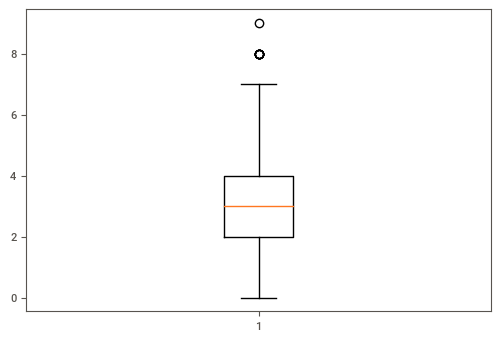

In [99]:
weather1_box=weather_box.wind
plt.boxplot(weather1_box)

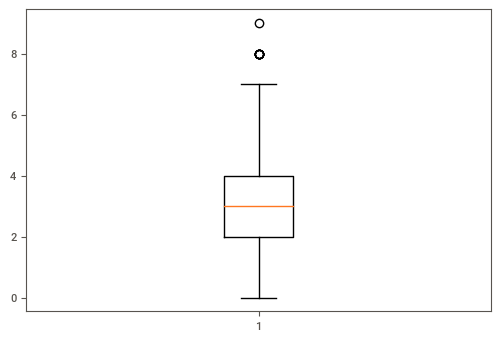

In [100]:
box = plt.boxplot(weather1_box)

In [101]:
[item.get_ydata() for item in box['fliers']]

[array([8, 8, 8, 9, 8, 8, 8, 8, 8], dtype=int64)]

In [102]:
[item.get_ydata() for item in box['whiskers']]

[array([2., 0.]), array([4., 7.])]

In [103]:
weather_cleaned_2['wind'].describe()

count    1378.000000
mean        2.828737
std         1.493530
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: wind, dtype: float64

<AxesSubplot:ylabel='date'>

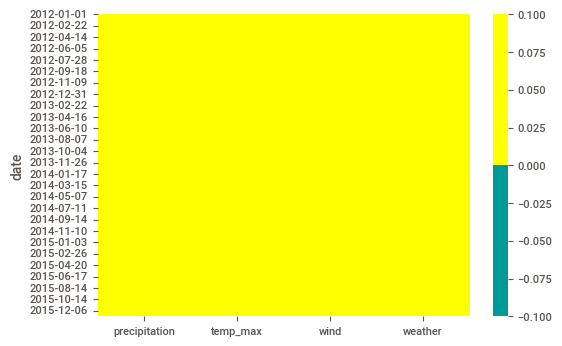

In [104]:
#check missing and imputation
import seaborn as sns

cols = weather_cleaned_2.columns
colours = ['#009999','#ffff00']

# colours - Yellow stands for missing and Blue stands for not missing 

sns.heatmap(weather_cleaned_2[cols].isnull(),cmap=sns.color_palette(colours))

In [145]:
weather_cleaned_2[weather_cleaned_2.isnull().any(axis=1)].head(40)

,precipitation,temp_max,wind,weather
date,,,,


In [106]:
weather_cleaned_2.isnull().sum()

precipitation    0
temp_max         0
wind             0
weather          0
dtype: int64

In [107]:
#mean 
mean = weather_cleaned_2['temp_max'].mean()

In [108]:
print(mean)

16.112989840348302


In [109]:
weather_cleaned_2['temp_max']= weather_cleaned_2['temp_max'].fillna(mean)

In [110]:
weather_cleaned_2.isnull().sum()

precipitation    0
temp_max         0
wind             0
weather          0
dtype: int64

In [111]:
#missing value for catogarical values
obj_columns=weather_cleaned_2[['precipitation']]
obj_columns

,precipitation
date,
2012-01-01,0.0
2012-01-02,10.9
2012-01-03,0.8
2012-01-04,20.3
2012-01-05,1.3
...,...
2015-12-27,8.6
2015-12-28,1.5
2015-12-29,0.0


In [112]:
obj_columns.isnull().sum()

precipitation    0
dtype: int64

In [113]:
obj_columns= obj_columns.fillna(obj_columns.mode().iloc[0])

In [114]:
obj_columns.isnull().sum()

precipitation    0
dtype: int64

In [115]:
weather_cleaned_2

,precipitation,temp_max,wind,weather
date,,,,
2012-01-01,0.0,12.8,4,drizzle
2012-01-02,10.9,10.6,4,rain
2012-01-03,0.8,11.7,2,rain
2012-01-04,20.3,12.2,4,rain
2012-01-05,1.3,8.9,6,rain
...,...,...,...,...
2015-12-27,8.6,4.4,2,rain
2015-12-28,1.5,5.0,1,rain
2015-12-29,0.0,7.2,2,fog


In [116]:
weather_cleaned_3  = pd.concat([weather_cleaned_2,obj_columns],axis=1)

In [117]:
weather_cleaned_3.isnull().sum()

precipitation    0
temp_max         0
wind             0
weather          0
precipitation    0
dtype: int64

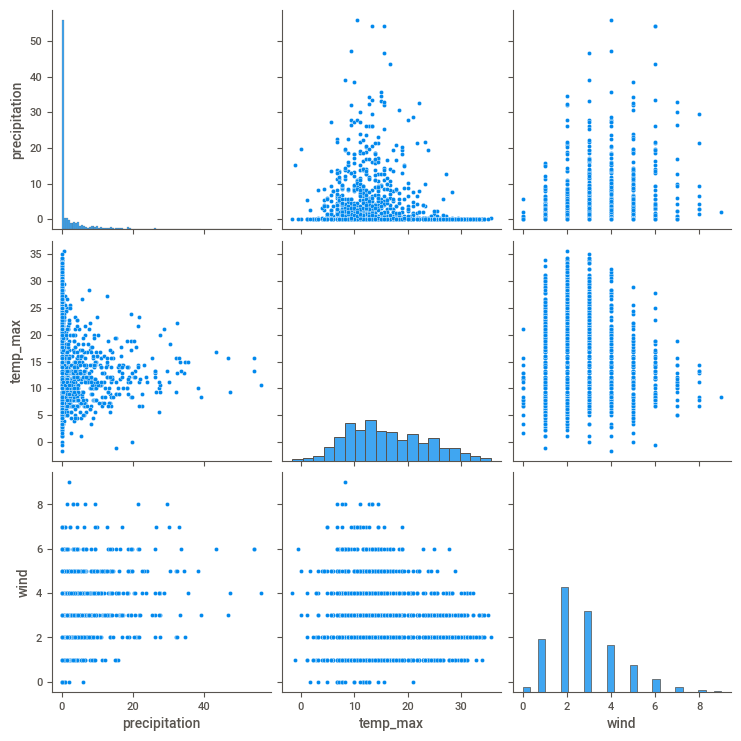

In [118]:
#use pairplot
sns.pairplot(weather_cleaned_2)

In [119]:
weather_cleaned_3

,precipitation,temp_max,wind,weather,precipitation
date,,,,,
2012-01-01,0.0,12.8,4,drizzle,0.0
2012-01-02,10.9,10.6,4,rain,10.9
2012-01-03,0.8,11.7,2,rain,0.8
2012-01-04,20.3,12.2,4,rain,20.3
2012-01-05,1.3,8.9,6,rain,1.3
...,...,...,...,...,...
2015-12-27,8.6,4.4,2,rain,8.6
2015-12-28,1.5,5.0,1,rain,1.5
2015-12-29,0.0,7.2,2,fog,0.0


In [120]:
#crateing dummy values for weather
weather_cleaned_4 = pd.get_dummies(weather1,columns=['weather'])

In [48]:
weather_cleaned_4

,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4,1,0,0,0,0
2012-01-02,10.9,10.6,2.8,4,0,0,1,0,0
2012-01-03,0.8,11.7,7.2,2,0,0,1,0,0
2012-01-04,20.3,12.2,5.6,4,0,0,1,0,0
2012-01-05,1.3,8.9,2.8,6,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2,0,0,1,0,0
2015-12-28,1.5,5.0,1.7,1,0,0,1,0,0
2015-12-29,0.0,7.2,0.6,2,0,1,0,0,0


In [121]:
!pip install pandas-profiling==3.2.0

In [122]:
!pip install sweetviz

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [126]:
pip install visions

In [146]:
import pandas_profiling as pp

import sweetviz as sv
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
EDA_report = pp.ProfileReport(weather1)

EDA_report.to_file(output_file='seattle_weather.html')

In [54]:
sweet_report =sv.analyze(weather1)
sweet_report.show_html('wind_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report wind_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
